In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
pio.templates.default = "plotly_white"



In [33]:
control_data=pd.read_csv('control_group.csv',sep=';') # читаем контрольную группу

In [34]:
control_data.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Control Campaign,1.08.2019,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,Control Campaign,2.08.2019,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0
2,Control Campaign,3.08.2019,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0
3,Control Campaign,4.08.2019,1940,72878.0,61235.0,3065.0,1042.0,982.0,1183.0,340.0
4,Control Campaign,5.08.2019,1835,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
test_data=pd.read_csv('test_group.csv',sep=';') # читаем тестовую группу 

In [36]:
test_data.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Test Campaign,1.08.2019,3008,39550,35820,3038,1946,1069,894,255
1,Test Campaign,2.08.2019,2542,100719,91236,4657,2359,1548,879,677
2,Test Campaign,3.08.2019,2365,70263,45198,7885,2572,2367,1268,578
3,Test Campaign,4.08.2019,2710,78451,25937,4216,2216,1437,566,340
4,Test Campaign,5.08.2019,2297,114295,95138,5863,2106,858,956,768


In [37]:
column='# of Impressions' # тестовая строка для проверки создаваемой функции

In [41]:
def change_column_name(column_name: ): # функция для переименования названия колонок
    column_name=column_name.replace("#","Number") # замена решетку на количество
    column_name=column_name.replace(" ","_") # замена пробелов на нижнее подчеркивание
    column_name=column_name.replace("[","") # убираем квадратную скобку
    column_name=column_name.replace("]","")

    
    return column_name

    

In [42]:
change_column_name(column)

'Number_of_Impressions'

Применяем функцию для переименования колонок


In [43]:
control_data.columns=control_data.columns.to_series().apply(change_column_name)

In [44]:
control_data.head()

,Campaign_Name,Date,Spend_USD,Number_of_Impressions,Reach,Number_of_Website_Clicks,Number_of_Searches,Number_of_View_Content,Number_of_Add_to_Cart,Number_of_Purchase
0,Control Campaign,1.08.2019,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,Control Campaign,2.08.2019,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0
2,Control Campaign,3.08.2019,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0
3,Control Campaign,4.08.2019,1940,72878.0,61235.0,3065.0,1042.0,982.0,1183.0,340.0
4,Control Campaign,5.08.2019,1835,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
test_data.columns=test_data.columns.to_series().apply(change_column_name)

In [46]:
test_data.head()

,Campaign_Name,Date,Spend_USD,Number_of_Impressions,Reach,Number_of_Website_Clicks,Number_of_Searches,Number_of_View_Content,Number_of_Add_to_Cart,Number_of_Purchase
0,Test Campaign,1.08.2019,3008,39550,35820,3038,1946,1069,894,255
1,Test Campaign,2.08.2019,2542,100719,91236,4657,2359,1548,879,677
2,Test Campaign,3.08.2019,2365,70263,45198,7885,2572,2367,1268,578
3,Test Campaign,4.08.2019,2710,78451,25937,4216,2216,1437,566,340
4,Test Campaign,5.08.2019,2297,114295,95138,5863,2106,858,956,768


In [47]:
control_data.shape # размер контрольной группы

(30, 10)

In [48]:
test_data.shape # размер тестовой группы

(30, 10)

In [49]:
control_data.dtypes # типы данных контрольной группы. Видем то что дата стринг надо поменять

Campaign_Name                object
Date                         object
Spend_USD                     int64
Number_of_Impressions       float64
Reach                       float64
Number_of_Website_Clicks    float64
Number_of_Searches          float64
Number_of_View_Content      float64
Number_of_Add_to_Cart       float64
Number_of_Purchase          float64
dtype: object

In [50]:
control_data.Date=pd.to_datetime(control_data.Date)

/tmp/ipykernel_18953/4266312071.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  control_data.Date=pd.to_datetime(control_data.Date)


In [51]:
control_data.dtypes

Campaign_Name                       object
Date                        datetime64[ns]
Spend_USD                            int64
Number_of_Impressions              float64
Reach                              float64
Number_of_Website_Clicks           float64
Number_of_Searches                 float64
Number_of_View_Content             float64
Number_of_Add_to_Cart              float64
Number_of_Purchase                 float64
dtype: object

In [52]:
test_data.dtypes

Campaign_Name               object
Date                        object
Spend_USD                    int64
Number_of_Impressions        int64
Reach                        int64
Number_of_Website_Clicks     int64
Number_of_Searches           int64
Number_of_View_Content       int64
Number_of_Add_to_Cart        int64
Number_of_Purchase           int64
dtype: object

In [53]:
test_data.Date=pd.to_datetime(test_data.Date)

/tmp/ipykernel_18953/598938530.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  test_data.Date=pd.to_datetime(test_data.Date)


In [54]:
test_data.dtypes

Campaign_Name                       object
Date                        datetime64[ns]
Spend_USD                            int64
Number_of_Impressions                int64
Reach                                int64
Number_of_Website_Clicks             int64
Number_of_Searches                   int64
Number_of_View_Content               int64
Number_of_Add_to_Cart                int64
Number_of_Purchase                   int64
dtype: object

In [55]:
control_data.isna().sum() # количество пустых значений в контрольной группе. Заменим пустые значения средним

Campaign_Name               0
Date                        0
Spend_USD                   0
Number_of_Impressions       1
Reach                       1
Number_of_Website_Clicks    1
Number_of_Searches          1
Number_of_View_Content      1
Number_of_Add_to_Cart       1
Number_of_Purchase          1
dtype: int64

In [56]:
def find_columns_with_empty_values(data): # функция для поиска столбцов с нанами
    columns_with_nans=data.columns[data.isna().any()].tolist()
    return columns_with_nans

In [57]:
conrol_data_empty=find_columns_with_empty_values(control_data) # список колонок с пустыми значениями

In [58]:
conrol_data_empty

['Number_of_Impressions',
 'Reach',
 'Number_of_Website_Clicks',
 'Number_of_Searches',
 'Number_of_View_Content',
 'Number_of_Add_to_Cart',
 'Number_of_Purchase']

In [59]:
def fill_empty_values(columns_with_nans,data):
    for i in columns_with_nans: # проходим по списку и заполняем пропуски
        data[i].fillna(data[i].mean().round(2),inplace=True)

In [60]:
fill_empty_values(conrol_data_empty,control_data)

In [61]:
control_data.isna().sum()

Campaign_Name               0
Date                        0
Spend_USD                   0
Number_of_Impressions       0
Reach                       0
Number_of_Website_Clicks    0
Number_of_Searches          0
Number_of_View_Content      0
Number_of_Add_to_Cart       0
Number_of_Purchase          0
dtype: int64

In [62]:
find_columns_with_empty_values(test_data) # в тестовой выборке у нас нет пусых значений


[]

In [63]:
control_data

,Campaign_Name,Date,Spend_USD,Number_of_Impressions,Reach,Number_of_Website_Clicks,Number_of_Searches,Number_of_View_Content,Number_of_Add_to_Cart,Number_of_Purchase
0,Control Campaign,2019-01-08,2280,82702.00,56930.00,7016.00,2290.00,2159.00,1819.0,618.00
1,Control Campaign,2019-02-08,1757,121040.00,102513.00,8110.00,2033.00,1841.00,1219.0,511.00
2,Control Campaign,2019-03-08,2343,131711.00,110862.00,6508.00,1737.00,1549.00,1134.0,372.00
3,Control Campaign,2019-04-08,1940,72878.00,61235.00,3065.00,1042.00,982.00,1183.0,340.00
4,Control Campaign,2019-05-08,1835,109559.76,88844.93,5320.79,2221.31,1943.79,1300.0,522.79
5,Control Campaign,2019-06-08,3083,109076.00,87998.00,4028.00,1709.00,1249.00,784.0,764.00
6,Control Campaign,2019-07-08,2544,142123.00,127852.00,2640.00,1388.00,1106.00,1166.0,499.00
7,Control Campaign,2019-08-08,1900,90939.00,65217.00,7260.00,3047.00,2746.00,930.0,462.00
8,Control Campaign,2019-09-08,2813,121332.00,94896.00,6198.00,2487.00,2179.00,645.0,501.00
9,Control Campaign,2019-10-08,2149,117624.00,91257.00,2277.00,2475.00,1984.00,1629.0,734.00


In [64]:
full_data=control_data.merge(test_data,how='outer')

/tmp/ipykernel_18953/3089305751.py:1: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  full_data=control_data.merge(test_data,how='outer')


In [65]:
full_data

,Campaign_Name,Date,Spend_USD,Number_of_Impressions,Reach,Number_of_Website_Clicks,Number_of_Searches,Number_of_View_Content,Number_of_Add_to_Cart,Number_of_Purchase
0,Control Campaign,2019-01-08,2280,82702.00,56930.00,7016.00,2290.00,2159.00,1819.0,618.00
1,Control Campaign,2019-02-08,1757,121040.00,102513.00,8110.00,2033.00,1841.00,1219.0,511.00
2,Control Campaign,2019-03-08,2343,131711.00,110862.00,6508.00,1737.00,1549.00,1134.0,372.00
3,Control Campaign,2019-04-08,1940,72878.00,61235.00,3065.00,1042.00,982.00,1183.0,340.00
4,Control Campaign,2019-05-08,1835,109559.76,88844.93,5320.79,2221.31,1943.79,1300.0,522.79
5,Control Campaign,2019-06-08,3083,109076.00,87998.00,4028.00,1709.00,1249.00,784.0,764.00
6,Control Campaign,2019-07-08,2544,142123.00,127852.00,2640.00,1388.00,1106.00,1166.0,499.00
7,Control Campaign,2019-08-08,1900,90939.00,65217.00,7260.00,3047.00,2746.00,930.0,462.00
8,Control Campaign,2019-09-08,2813,121332.00,94896.00,6198.00,2487.00,2179.00,645.0,501.00
9,Control Campaign,2019-10-08,2149,117624.00,91257.00,2277.00,2475.00,1984.00,1629.0,734.00


In [66]:
full_data.Campaign_Name.value_counts()

Control Campaign    30
Test Campaign       30
Name: Campaign_Name, dtype: int64

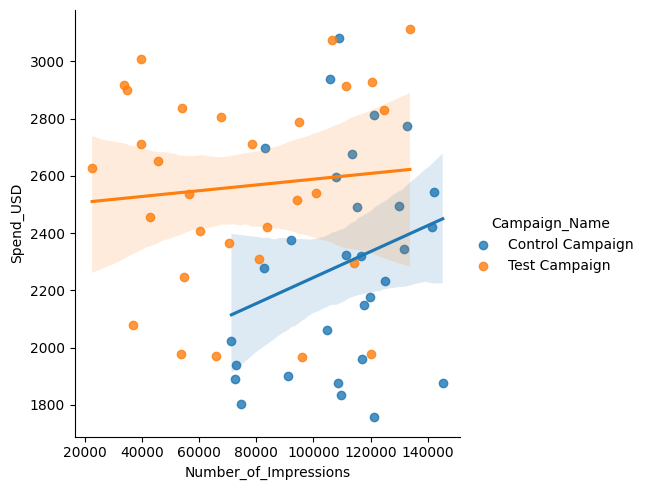

In [67]:

sns.lmplot(data=full_data,x='Number_of_Impressions',
                               y='Spend_USD',
                                  hue='Campaign_Name')

In [85]:
label=['Total Searches from Control Campaign',
       'Total Searches from Test Campaign']
counts=[sum(control_data.Number_of_Searches),
        sum(test_data.Number_of_Searches)]
fig=go.Figure(data=[go.Pie(labels=label,values=counts)])
fig.update_layout(title_text='Control Vs Test: Searches')
fig.update_traces(hoverinfo='label+percent', textinfo='value', 
                  textfont_size=30,
                  marker=dict(colors=px.colors.qualitative.Dark24,line=dict(color='black', width=2)))
fig.show()

In [87]:
label=['Total Website Clicks from Control Campaign',
       'Total Website Clicks from Test Campaign']
counts=[sum(control_data.Number_of_Website_Clicks),
        sum(test_data.Number_of_Website_Clicks)]
fig=go.Figure(data=[go.Pie(labels=label,values=counts)])
fig.update_layout(title_text='Control Vs Test: Website Clicks')
fig.update_traces(hoverinfo='label+percent', textinfo='value', 
                  textfont_size=30,
                  marker=dict(colors=px.colors.qualitative.Dark24,line=dict(color='black', width=2)))
fig.show()

In [88]:
label=['Content Viewed from Control Campaign',
       'Content Viewed from Test Campaign']
counts=[sum(control_data.Number_of_View_Content),
        sum(test_data.Number_of_View_Content)]
fig=go.Figure(data=[go.Pie(labels=label,values=counts)])
fig.update_layout(title_text='Control Vs Test: Content Viewed')
fig.update_traces(hoverinfo='label+percent', textinfo='value', 
                  textfont_size=30,
                  marker=dict(colors=px.colors.qualitative.Dark24,line=dict(color='black', width=2)))
fig.show()

In [90]:
label=['Products added to Cart from Control Campaign',
       'Products added to Cart from Test Campaign']
counts=[sum(control_data.Number_of_Add_to_Cart),
        sum(test_data.Number_of_Add_to_Cart)]
fig=go.Figure(data=[go.Pie(labels=label,values=counts)])
fig.update_layout(title_text='Control Vs Test: Added to Cart ')
fig.update_traces(hoverinfo='label+percent', textinfo='value', 
                  textfont_size=30,
                  marker=dict(colors=px.colors.qualitative.Dark24,line=dict(color='black', width=2)))
fig.show()

In [91]:
label=['Amount Spent from Control Campaign',
       'Amount Spent from Test Campaign']
counts=[sum(control_data.Spend_USD),
        sum(test_data.Spend_USD)]
fig=go.Figure(data=[go.Pie(labels=label,values=counts)])
fig.update_layout(title_text='Control Vs Test: Amount Spent ')
fig.update_traces(hoverinfo='label+percent', textinfo='value', 
                  textfont_size=30,
                  marker=dict(colors=px.colors.qualitative.Dark24,line=dict(color='black', width=2)))
fig.show()

In [93]:
label=['Purchases made from Control Campaign',
       'Purchases made from Test Campaign']
counts=[sum(control_data.Number_of_Purchase),
        sum(test_data.Number_of_Purchase)]
fig=go.Figure(data=[go.Pie(labels=label,values=counts)])
fig.update_layout(title_text='Control Vs Test: Purchases ')
fig.update_traces(hoverinfo='label+percent', textinfo='value', 
                  textfont_size=30,
                  marker=dict(colors=px.colors.qualitative.Dark24,line=dict(color='black', width=2)))
fig.show()

In [94]:
full_data.columns

Index(['Campaign_Name', 'Date', 'Spend_USD', 'Number_of_Impressions', 'Reach',
       'Number_of_Website_Clicks', 'Number_of_Searches',
       'Number_of_View_Content', 'Number_of_Add_to_Cart',
       'Number_of_Purchase'],
      dtype='object')

In [95]:
figure=px.scatter(data_frame=full_data,
                 x='Number_of_View_Content',
                 y='Number_of_Website_Clicks',
                 size='Number_of_Website_Clicks',
                 color='Campaign_Name',
                 trendline='ols')
figure.show()

In [96]:
figure=px.scatter(data_frame=full_data,
                 x='Number_of_Add_to_Cart',
                 y='Number_of_View_Content',
                 size='Number_of_Add_to_Cart',
                 color='Campaign_Name',
                 trendline='ols')
figure.show()

In [97]:
figure=px.scatter(data_frame=full_data,
                 x='Number_of_Purchase',
                 y='Number_of_Add_to_Cart',
                 size='Number_of_Purchase',
                 color='Campaign_Name',
                 trendline='ols')
figure.show()